<a href="https://colab.research.google.com/github/doryeng/web1/blob/master/FBProphet_NC_Soft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 엔씨소프트 주가예측
Facebook Prophet를 이용한 주가 예측

In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [3]:
start = datetime(1971, 2, 8)
end = datetime(2020, 6, 19)

NS = web.DataReader('036570.KS','yahoo',start,end)
NS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-07-12,29266.699219,29266.699219,29266.699219,29266.699219,600.0,26186.103516
2000-07-13,32766.699219,32766.699219,32766.699219,32766.699219,277200.0,29317.695312
2000-07-14,36666.699219,34833.300781,36666.699219,36666.699219,499200.0,32807.175781
2000-07-17,36666.699219,36666.699219,36666.699219,36666.699219,0.0,32807.175781
2000-07-18,41000.000000,41000.000000,41000.000000,41000.000000,29700.0,36684.363281


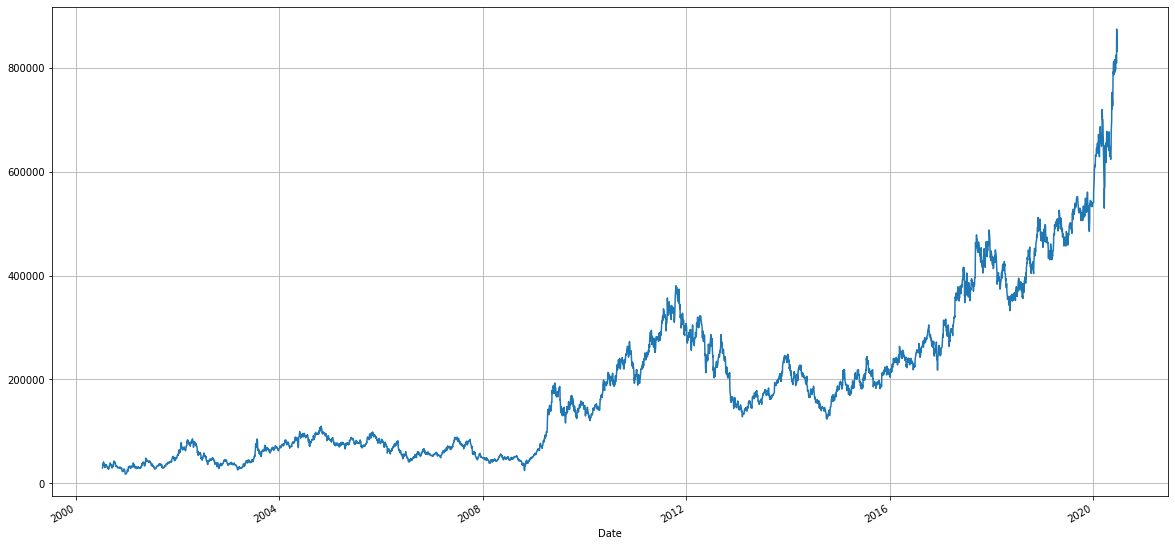

In [4]:
NS['Close'].plot(figsize=(20,10), grid=True);

In [5]:
df = pd.DataFrame({'ds':NS.index, 'y':NS['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-07-12,29266.699219
1,2000-07-13,32766.699219
2,2000-07-14,36666.699219
3,2000-07-17,36666.699219
4,2000-07-18,41000.000000


In [6]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=True)
m.fit(df);

future = m.make_future_dataframe(periods=365) # 예측기간은 365일
future.head()   # 예측 시작 5회까지를 보여줌

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,ds
0,2000-07-12
1,2000-07-13
2,2000-07-14
3,2000-07-17
4,2000-07-18


In [7]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(300)

,ds,yhat,yhat_lower,yhat_upper
4980,2020-08-24,642141.862197,605914.114781,675786.984972
4981,2020-08-25,643426.322534,604437.762428,679165.703444
4982,2020-08-26,644715.167216,607773.542823,681508.443777
4983,2020-08-27,645507.844683,608077.362491,682867.222712
4984,2020-08-28,646199.626861,609068.239107,683490.536690
...,...,...,...,...
5275,2021-06-15,729832.947679,682651.853892,778976.750059
5276,2021-06-16,730069.020167,684585.726605,779223.594715
5277,2021-06-17,729781.619929,686149.444296,777321.101111
5278,2021-06-18,729376.623831,683280.430050,779678.077414


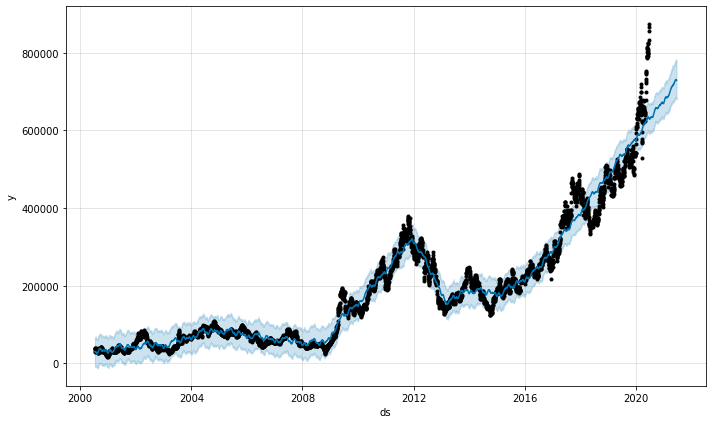

In [8]:
m.plot(forecast);

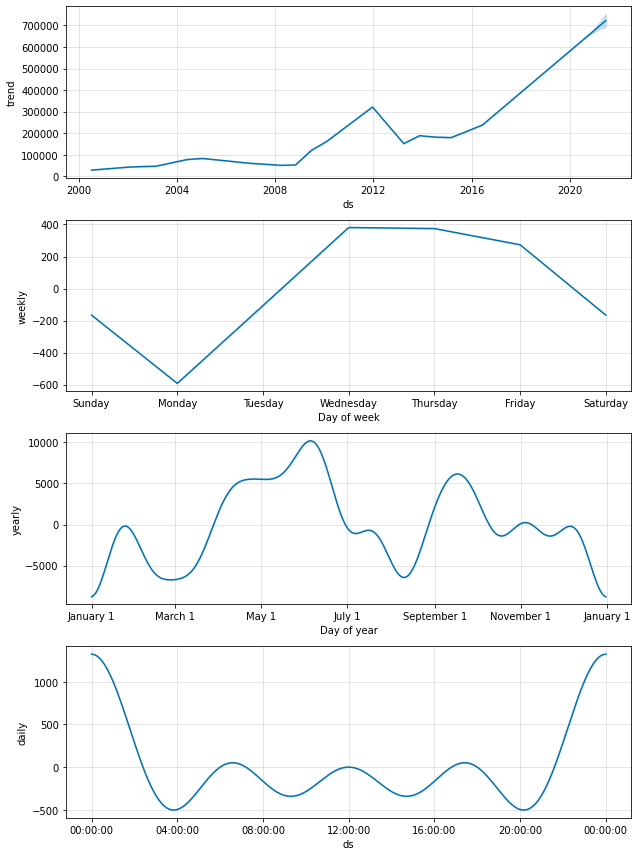

In [9]:
m.plot_components(forecast);